## Feature Engineering

In [101]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from sklearn.preprocessing import PowerTransformer

Loading dataset

In [102]:
df = pd.read_csv('../data/Titanic-Dataset.csv')

df.shape

(891, 12)

In [103]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Coluna                  | Descrição                                                            |
|-------------------------|----------------------------------------------------------------------|
| PassengerId             | This columns assigns a unique identifier for each passanger         |
| Survived                | Specifies whether the given passenger survived or not (1-survived), 0-didn't survived|
| Pclass                  | The passenger's class. (1: First class, 2:Second class, 3: Third class)   |
| Name                    | The name of the passenger.                                           |
| Sex                     | The sex of the passenger (male, female)                              |
| Age                     | The age of the passenger in years                                    |
| SibSp                   | How many siblings or spouses the passenger had on board with them   |
| Parch                   | How many parents or children the passenger had on board with them   |
| Ticket                  | The ticket of the passenger                                         |
| Fare                    | The fare amount paid by the passenger for the trip                  |
| Cabin                   | The cabin the passenger stayed                                      |
| Embarked                | The place from which the passenger embarked (S: Cherboung, C: Queenstown, Q:Southampton )|


NOTE: Each of these features provides different types of information, such as demographic details, travel conditions, and socio-economic status, which can be used to predict the likelihood of a passenger's survival on the Titanic

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
# Descriptive Stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Exploration (EDA)

In [106]:
# extracts the title (Mr, Ms, etc) from  the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

df['title'] = df['Name'].apply(get_title)

In [107]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
title           object
dtype: object

In [108]:
# drop unnecessary variables
df.drop(labels=['Name','PassengerId'], axis=1, inplace=True)

In [109]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('O')
convert_cat(df, features)

In [110]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [111]:
df_nan_ratios = df.isna().sum()


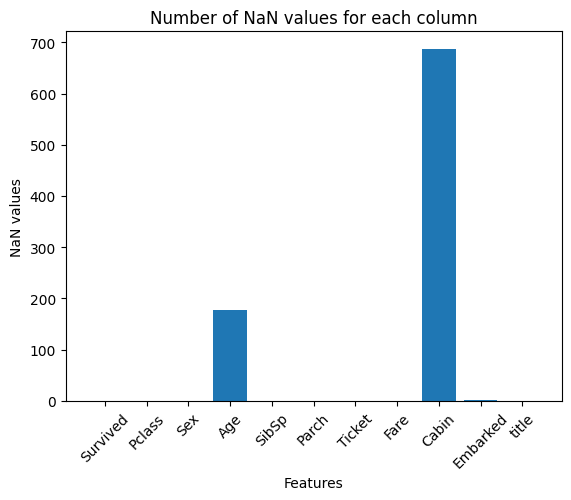

In [112]:
x_bar = np.arange(len(df_nan_ratios.index))
plt.bar(x_bar, df_nan_ratios.values)
plt.xticks(x_bar, df_nan_ratios.index, rotation=45)
plt.xlabel("Features")
plt.ylabel("NaN values")
plt.title('Number of NaN values for each column')
plt.show()


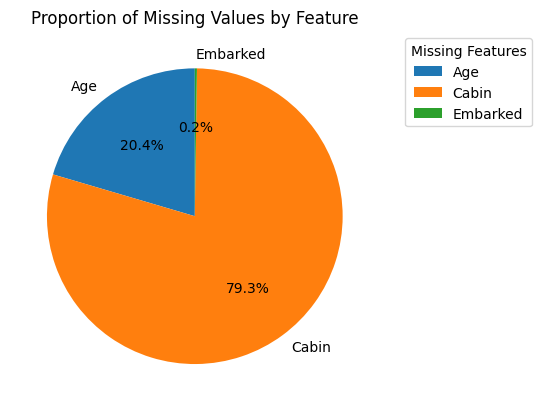

In [113]:
missing_features = df_nan_ratios[df_nan_ratios > 0]

plt.pie(missing_features.values / df.shape[0], labels=missing_features.index, autopct='%1.1f%%', startangle=90)
plt.legend(title='Missing Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Proportion of Missing Values by Feature')
plt.show()

We can also visualize the percentage of missing values

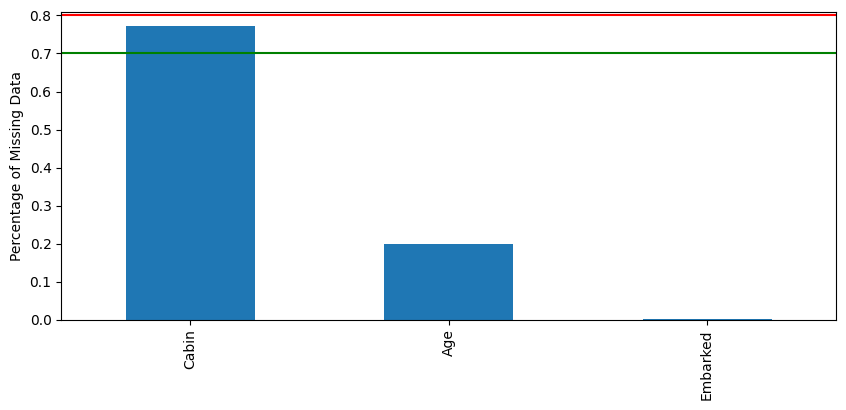

In [114]:


df[df.columns[df.isnull().any()]].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))

plt.ylabel("Percentage of Missing Data")
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axhline(y=0.70, color='g', linestyle='-')

plt.show()



In [115]:
ser_count = df['Survived'].value_counts()
ser_count

Survived
0    549
1    342
Name: count, dtype: int64

In [116]:
list_survived_ratio = [ser_count[idx]/df.shape[0] for idx in ser_count.index]
print(list_survived_ratio)

[np.float64(0.6161616161616161), np.float64(0.3838383838383838)]


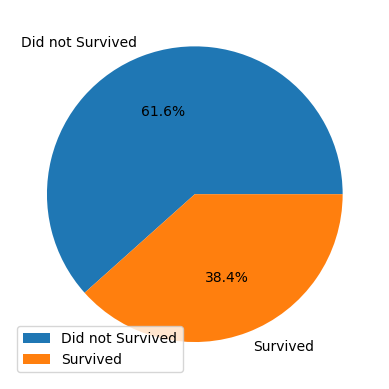

In [117]:
plt.pie(list_survived_ratio, labels=['Did not Survived', 'Survived'], autopct='%1.1f%%')
plt.legend()
plt.show()

Evaluating numerical variable distribution and determining the need for transformation

In [118]:
def analyze_distribution(df, column):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Original Distribution of {column}')

    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[column])
    plt.title('Box Plot')

    # Q-Q Plot (Normality Check)
    plt.subplot(2, 2, 3)
    stats.probplot(df[column], plot=plt)
    plt.title('Q-Q Plot')

    # Descriptive Stats
    plt.subplot(2, 2, 4)
    plt.text(0.1, 0.5,
             f"Skewness: {df[column].skew():.2f}\n"
             f"Kurtosis: {df[column].kurtosis():.2f}\n"
             f"Min: {df[column].min():.2f}\n"
             f"Max: {df[column].max():.2f}\n"
             f"Mean: {df[column].mean():.2f}\n",
             f"Median: {df[column].median():.2f}",
             fontsize=10)
    plt.axis("off")
    plt.title('Descriptive Statistics')

    plt.tight_layout()
    plt.show()


def evaluate_transformations(df, column):
    """Transformation candidates"""
    plt.figure(figsize=(15, 5))

    plt.subplot(141)
    sns.histplot(df[column], kde=True)
    plt.title(f"Original Distribution of {column}")


    # Log transformation
    plt.subplot(142)
    sns.histplot(np.log1p(df[column]), kde=True)
    plt.title('Log (log(x+1))')

    # Square Root Transformation
    sns.histplot(np.sqrt(df[column]), kde=True)
    plt.title('Square Root')

    # Box-Cox Transformation
    plt.subplot(143)
    try:
        transformed_data = stats.boxcox(df[column])[0]
        sns.histplot(transformed_data, kde=True)
        plt.title('Box-Cox')
    except Exception as e:
        plt.text(0.5, 0.5, "Box-Cox\nNot Applicable",
                 horizontalalignment='center',
                 verticalalignment='center')
    plt.tight_layout()
    plt.show()


Statistic Criteria for transformation (Preparation Phase)

In [119]:
def determine_transformation(df, column, threshold=1):
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    print("Distribution Assessment:")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    transformation_needed = False
    recommendation = "No transformation"

    if abs(skewness) > threshold:
        transformation_needed = True
        recommendation = "Log or Square Root Transformation"
    
    if abs(kurtosis) > threshold:
        transformation_needed = True
        recommendation = "Box-Cox or Yeo-Johnson Transformation"
    print(f"Recommendation: {recommendation}")
    return transformation_needed, recommendation

def apply_transformation(df, column, method='log'):
    if method == 'log':
        return np.log1p(df[column])
    elif method == 'sqrt':
        return np.sqrt(df[column])
    elif method == 'yeo-johnson':
        transformer =PowerTransformer(method='yeo-johnson')
        return transformer.fit_transform(df[column])


Decision Making workflow to determine the  need for transformation

1.Visualize Original Distribution
2. Check Skewness and kurtosis
3. Evaluate Transformation Candidates
4. Select Appropriate Transformation
5. Apply Transformation
6. Validate Transformation impact

Practical Recommendation

- Log Transformation: Right-skewed data, positive values
- Square Root: Moderately skewed data
- Box-Cox: Near-normal distribution needed
- Yeo-johnson: Handles negative values, more flexible

Key Metrics to Consider

- Skewness: Asymmetry of distribution
    - Near 0: Symmetrical
    - 1 or < -1: Highly skewed
- Kurtosis: Tail heaviness
    - Near 0: Normal distribution
    - 3: Heavy-tailed
    - <3: Light-tailed

---

NOTE: 

- Transformation are not always necessary
- Consider algorithm sensitivity
- Validate model performance before and after transformation
- Use cross-validation to ensure transformation benefit

---

### Managing Missing Data and Implementing Imputation Techniques

It´s recommended to handle missing data first before applying transformations

In [120]:
# setting target feature

target = 'Survived'

In [121]:
# let's identify the categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
print(len(cat_vars))
print(cat_vars)

8
['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'title']


In [125]:
# let's identify the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var != target ]

print(len(num_vars))
print(num_vars)

2
['Age', 'Fare']


Let´s go ahead and find out which variables of the dataset contain missing values

In [126]:
var_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

print(var_with_na)
df[var_with_na].isnull().mean().sort_values(ascending=False)

['Age', 'Cabin', 'Embarked']


Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

In [127]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorial
cat_na = [var for var in cat_vars if var in var_with_na]
num_na = [var for var in num_vars if var in var_with_na]

print(f"Number of categorical variables with na: {len(cat_na)} - {cat_na} ")
print(f'Number of numerical variables with na: {len(num_na)} - {num_na} ')

Number of categorical variables with na: 2 - ['Cabin', 'Embarked'] 
Number of numerical variables with na: 1 - ['Age'] 
